**Problem statement**
* Use relevant machine learning model to predict whether a person is willing for work/study from office or work/study from home

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data=pd.read_csv('psyco.csv')

In [3]:
data.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
data.shape

(1175, 22)

In [5]:
data.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw', 'Unnamed: 19', 'time_bp.1',
       'travel+work'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

In [7]:
data.drop(['Unnamed: 19'],axis=1,inplace=True)

In [8]:
data.drop('travel+work',axis=1,inplace=True)

In [9]:
data.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw', 'time_bp.1'],
      dtype='object')

In [10]:
num_col=data.select_dtypes(include=('int64','float64'))

In [11]:
num_col.columns

Index(['time_bp', 'time_dp', 'travel_time', 'easeof_online', 'home_env',
       'prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed',
       'self_time', 'like_hw', 'dislike_hw', 'time_bp.1'],
      dtype='object')

In [12]:
cat_col=data.select_dtypes(include='O')

In [13]:
cat_col.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'prefer',
       'certaindays_hw'],
      dtype='object')

In [14]:
for i in cat_col:
  print(i,data[i].unique())
  print(i,data[i].value_counts())

age ['19-25' 'Dec-18' '33-40' '60+' '26-32' '40-50' '50-60']
age 19-25     345
26-32     261
40-50     181
50-60     170
33-40     102
Dec-18     74
60+        42
Name: age, dtype: int64
gender ['Male' 'Female' 'Prefer not to say']
gender Male                 649
Female               518
Prefer not to say      8
Name: gender, dtype: int64
occupation ['Student in College' 'Student in School' 'Working Professional'
 'Entrepreneur' 'Retired/Senior Citizen' 'Homemaker'
 'Currently Out of Work'
 'Medical Professional aiding efforts against COVID-19']
occupation Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Ci

**Exploratory Data Analysis**

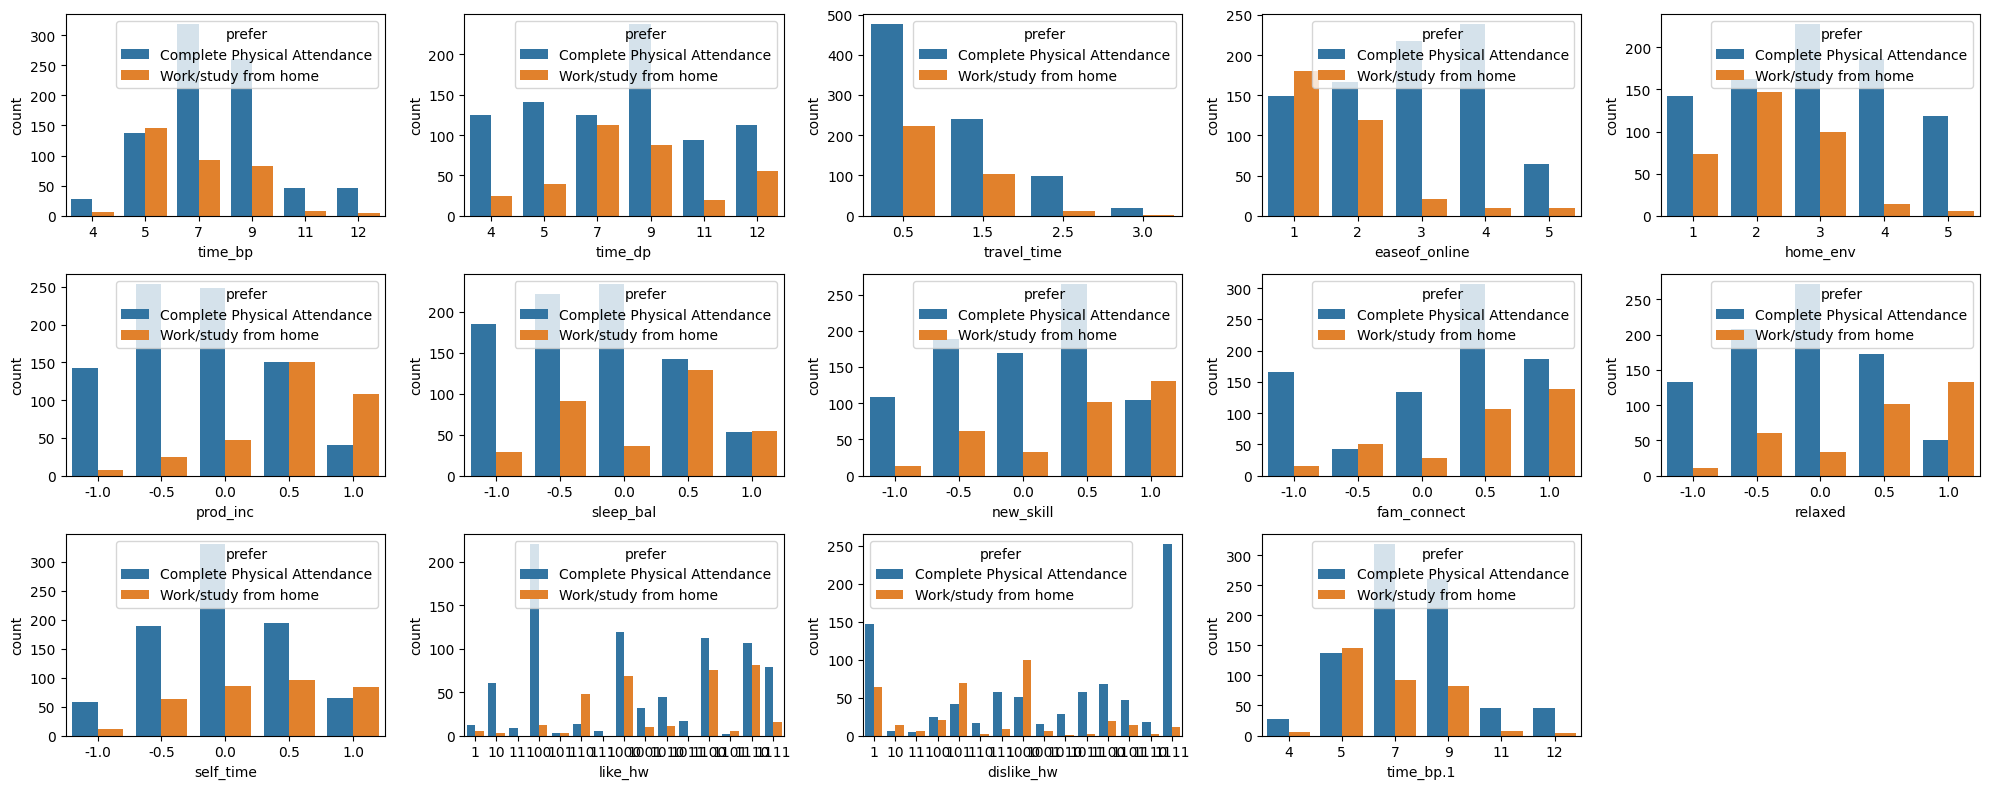

In [15]:
# Univariate Analysis
# numerical columns
plt.figure(figsize=(20,8))
plotnumber=1
for i in num_col:
  if plotnumber<=14:

    ax=plt.subplot(3,5,plotnumber)
    sns.countplot(x=data[i],hue=data['prefer'])
  plotnumber+=1
plt.tight_layout()


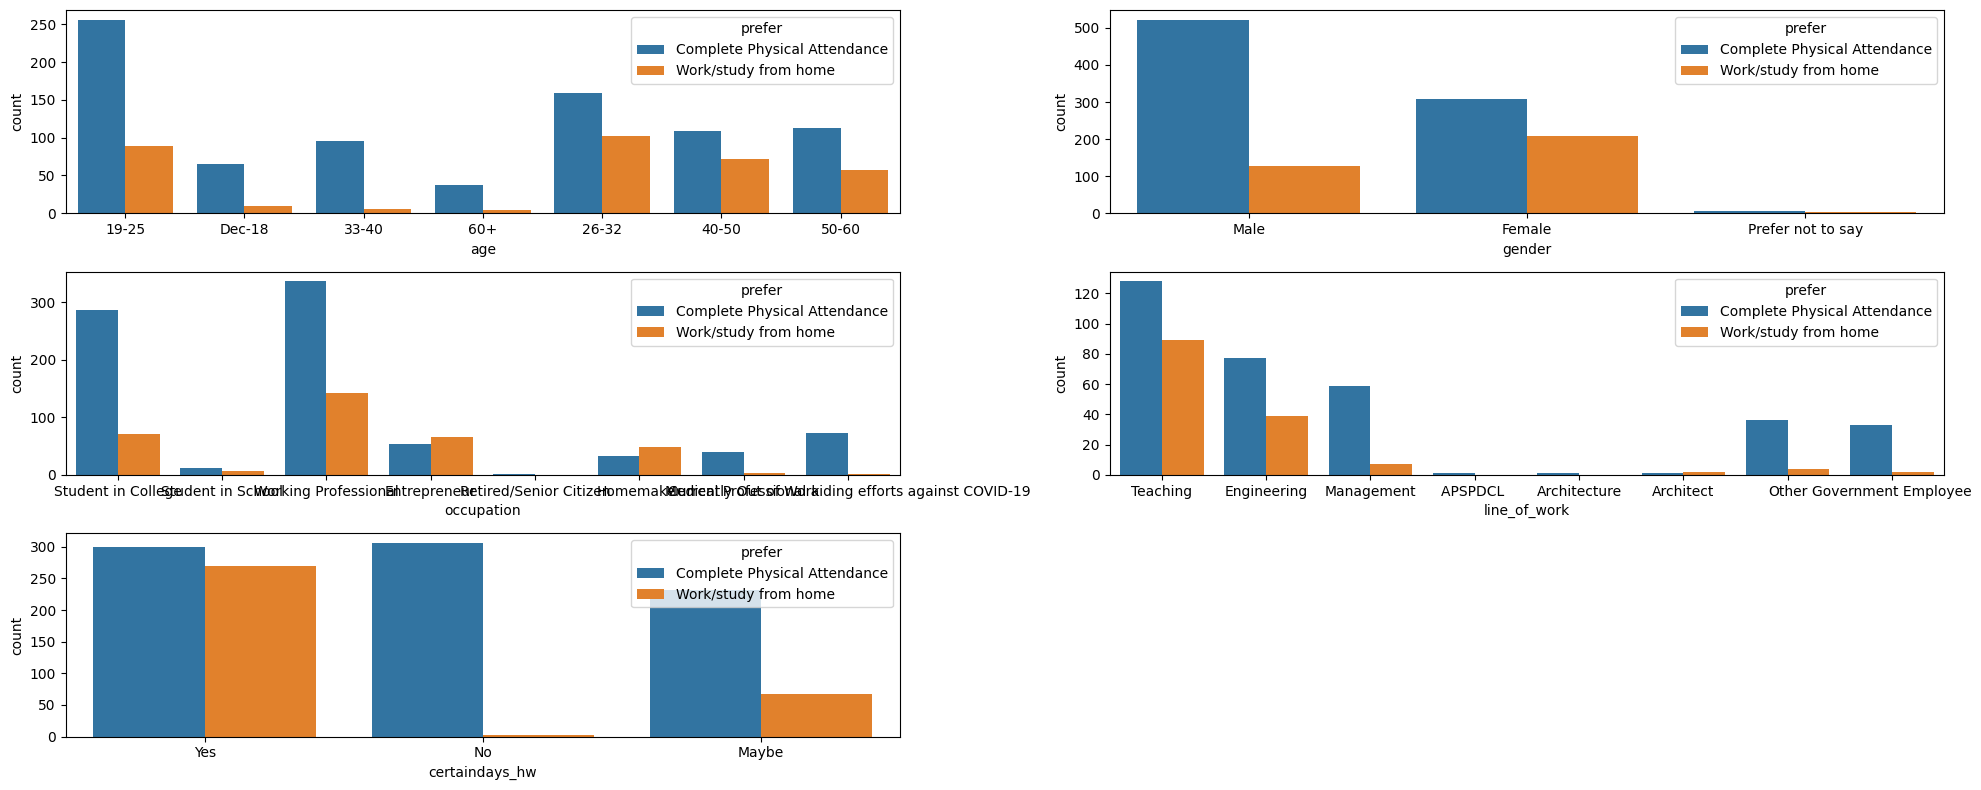

In [16]:
# Categorical columns
plt.figure(figsize=(20,8))
plotnumber=1
for i in cat_col.drop('prefer',axis=1):
  if plotnumber<=6:

    ax=plt.subplot(3,2,plotnumber)
    sns.countplot(x=data[i],hue=data['prefer'])
  plotnumber+=1
plt.tight_layout()


**Datapreprocessing**

In [17]:
# Handle the missing values
data['line_of_work'].isnull().sum()

696

In [18]:
data['line_of_work'].value_counts()

Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: line_of_work, dtype: int64

In [19]:
data.loc[data['line_of_work'].isnull()==True,'line_of_work']='Teaching'

In [20]:
data['line_of_work'].isnull().sum()

0

**Converting categorical into numerical**

In [21]:
data['age'].unique()

array(['19-25', 'Dec-18', '33-40', '60+', '26-32', '40-50', '50-60'],
      dtype=object)

<Axes: xlabel='age', ylabel='count'>

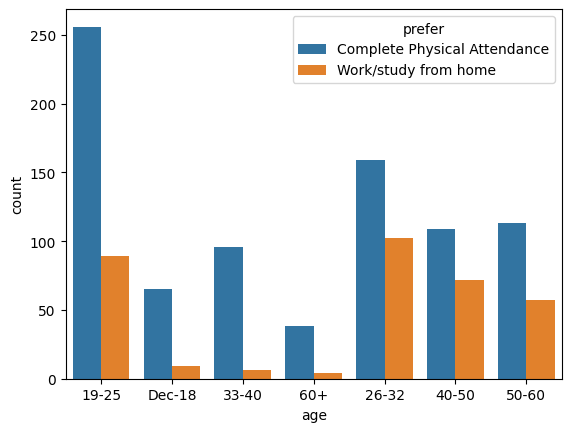

In [22]:
sns.countplot(x=data['age'],hue=data['prefer'])

In [23]:
data['age']=data['age'].map({'26-32':6,'19-25':5,'40-50':4,'50-60':3,'Dec-18':2,'33-40':1,'60+':0})

In [24]:
data.gender.unique()

array(['Male', 'Female', 'Prefer not to say'], dtype=object)

<Axes: xlabel='gender', ylabel='count'>

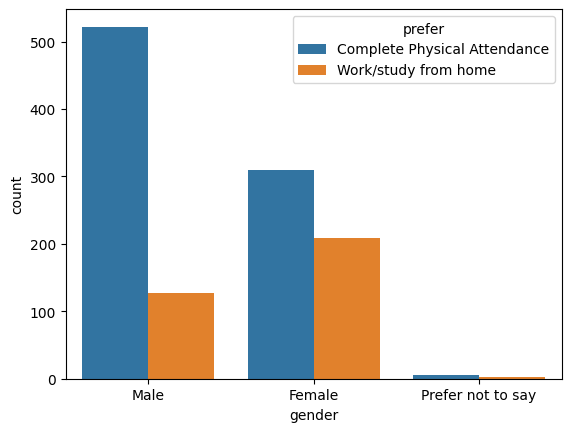

In [25]:
sns.countplot(x=data['gender'],hue=data['prefer'])

In [26]:
data.gender=data.gender.map({'Male':1,'Female':2,'Prefer not to say':0})

In [27]:
#occupaation
data.occupation.unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

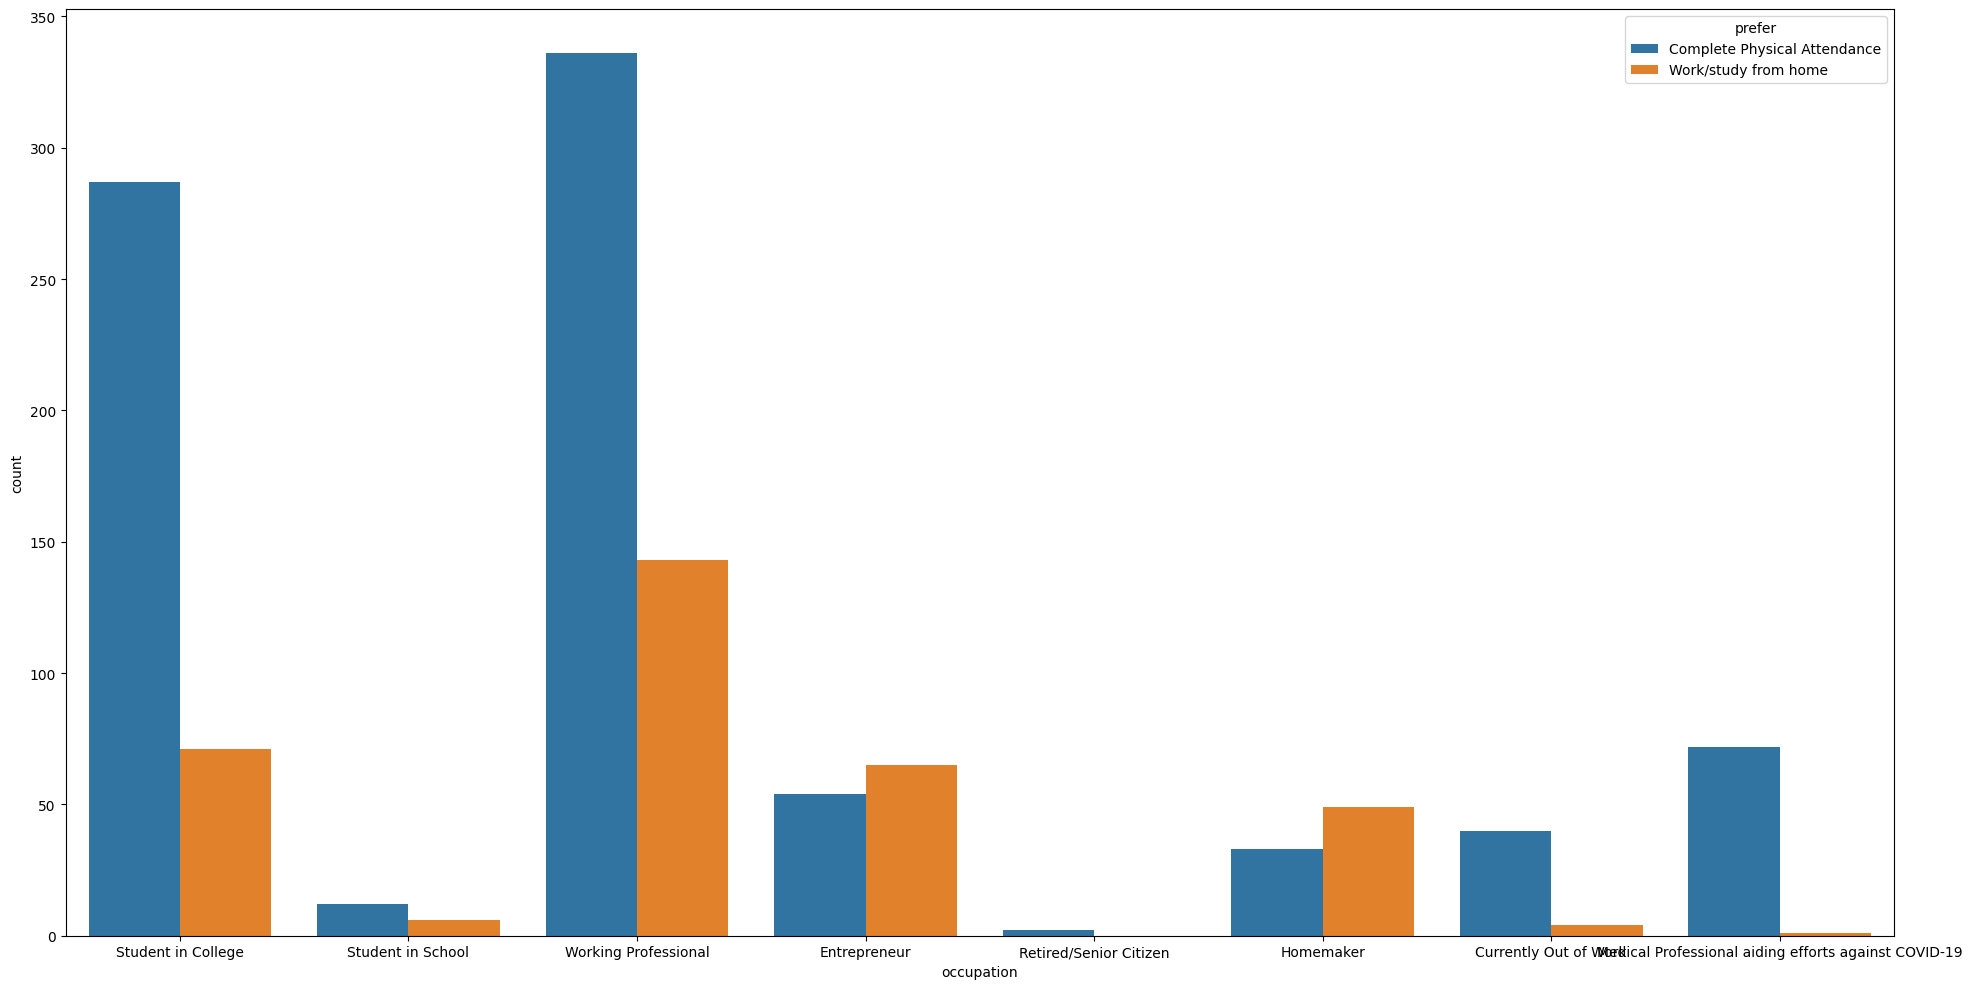

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['occupation'],hue=data['prefer'])
plt.tight_layout()

In [29]:
data.occupation=data.occupation.map({'Working Professional':7,'Student in College':6,'Entrepreneur':5,'Homemaker':4,'Student in School':3,'Currently Out of Work':2,'Medical Professional aiding efforts against COVID-19':1,'Retired/Senior Citizen':0})

In [30]:
#line_of_work
data['line_of_work'].unique()

array(['Teaching', 'Engineering', 'Management', 'APSPDCL ',
       'Architecture', 'Architect', 'Other', 'Government Employee'],
      dtype=object)

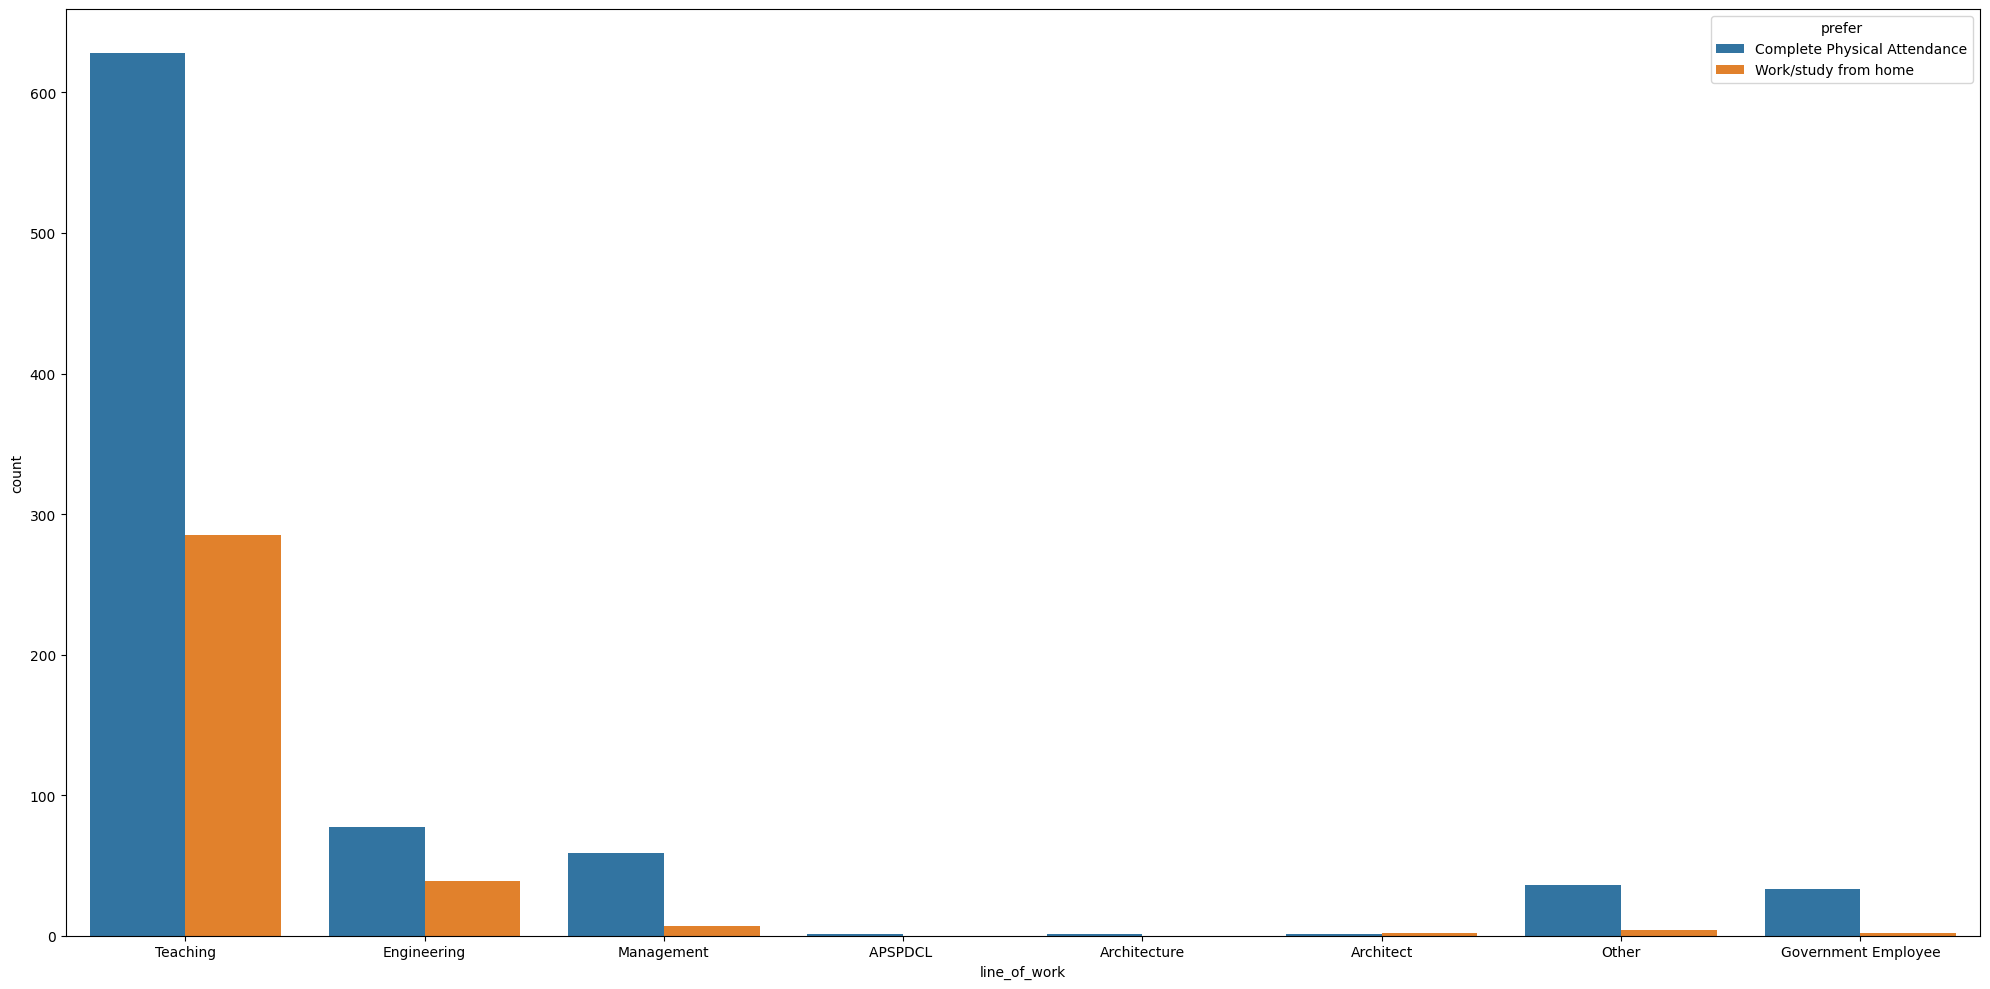

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['line_of_work'],hue=data['prefer'])
plt.tight_layout()

In [32]:
data['line_of_work']=data['line_of_work'].map({'Teaching':7,'Engineering':6,'Management':5,'Other':4,'Government Employee':3,'Architect':2,'Architecture':1,'APSPDCL':0})

In [33]:
data.prefer.value_counts()

Complete Physical Attendance    836
Work/study from home            339
Name: prefer, dtype: int64

In [34]:
data.prefer=data.prefer.map({'Complete Physical Attendance':0,'Work/study from home':1})

In [35]:
data.certaindays_hw.unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

<Axes: xlabel='certaindays_hw', ylabel='count'>

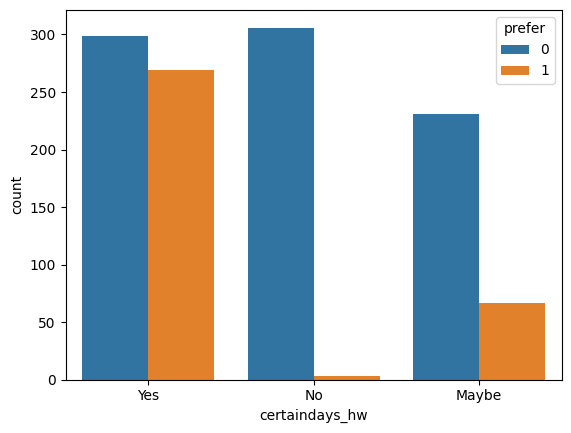

In [36]:
sns.countplot(x=data['certaindays_hw'],hue=data['prefer'])

In [37]:
data['certaindays_hw']=data['certaindays_hw'].map({'No':0,'Maybe':1,'Yes':2})

In [38]:
data.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,time_bp.1
0,5,1,6,7.0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2,7
1,2,1,3,7.0,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,0,7
2,5,1,6,7.0,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2,7
3,5,1,6,7.0,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2,7
4,5,2,6,7.0,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2,7


## Check for outliers

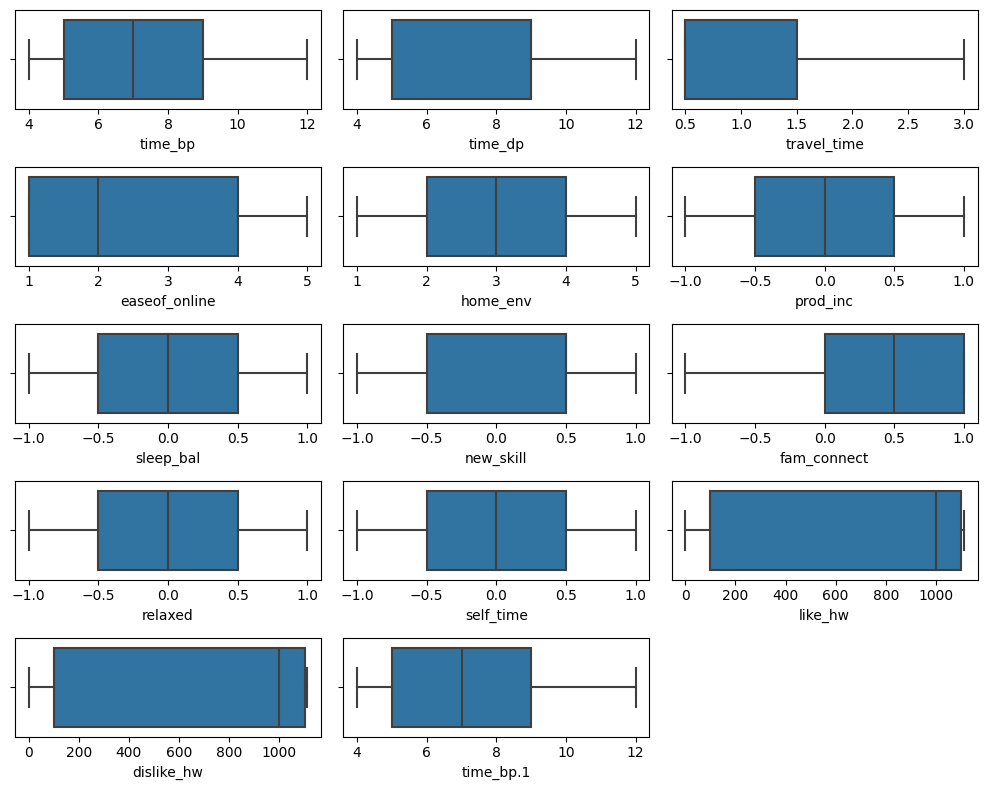

In [39]:
plt.figure(figsize=(10,8))
plotnumber=1
for i in num_col:
  if plotnumber<=14:
    ax=plt.subplot(5,3,plotnumber)
    sns.boxplot(data=data,x=data[i])
  plotnumber+=1
plt.tight_layout()

##Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
data[['like_hw','dislike_hw']]=scaling.fit_transform(data[['like_hw','dislike_hw']])

In [41]:
data.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,time_bp.1
0,5,1,6,7.0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,0.089189,0.000000,0,2,7
1,2,1,3,7.0,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1.000000,0.999099,0,0,7
2,5,1,6,7.0,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,0.990090,0.099099,0,2,7
3,5,1,6,7.0,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,0.089189,1.000000,0,2,7
4,5,2,6,7.0,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,0.909009,0.900000,0,2,7


In [42]:
data['home_env'].unique()

array([3, 2, 1, 4, 5])

##Model Creation

In [43]:
from sklearn.model_selection import train_test_split
x=data.drop('prefer',axis=1)
y=data.prefer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [44]:
x_train.shape

(822, 19)

In [45]:
y_train.value_counts()

0    577
1    245
Name: prefer, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [47]:
from collections import Counter
print('Actual classes',Counter(y_train))
print('Smote classes', Counter(y_smote))

Actual classes Counter({0: 577, 1: 245})
Smote classes Counter({0: 577, 1: 577})


##Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_smote,y_smote)

LogisticRegression()

In [49]:
x_test.loc[x_test['line_of_work'].isnull()==True,'line_of_work']=7

In [50]:
y_pred=LR.predict(x_test)

##Evaluation

In [51]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.830028328611898

In [52]:
f1_score(y_test,y_pred)

0.7058823529411765

In [53]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prefer,,
0,221,38
1,22,72


##KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_smote,y_smote)

KNeighborsClassifier()

In [55]:
y_pred=KNN.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred)

0.8980169971671388

In [57]:
error_rate=[]
for i in range(3,14):
  KNN=KNeighborsClassifier(n_neighbors=i)
  KNN.fit(x_smote,y_smote)
  pred_i=KNN.predict(x_test)
  error_rate.append(np.mean(y_test != pred_i))

Text(0, 0.5, 'Error Rate')

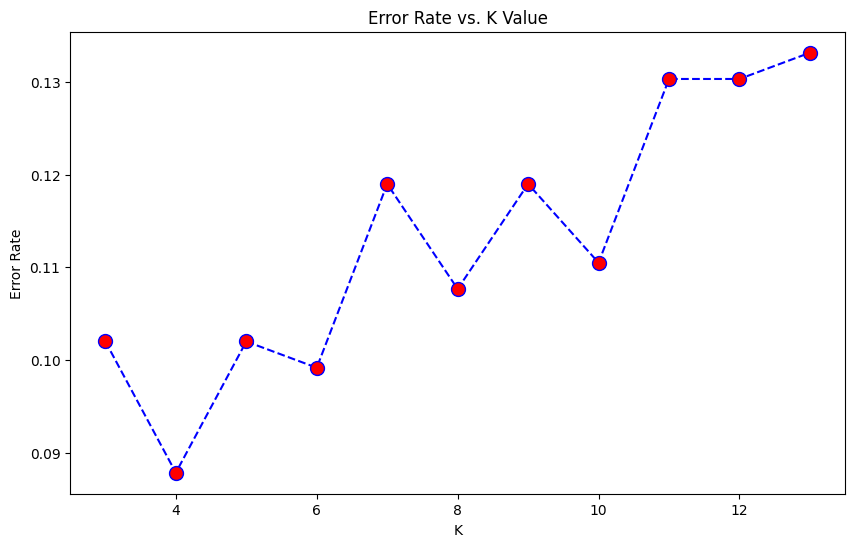

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(3,14),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [59]:
table=pd.DataFrame(error_rate,index=(range(3,14)))
table

,0
3,0.101983
4,0.087819
5,0.101983
6,0.099150
7,0.118980
8,0.107649
9,0.118980
10,0.110482
11,0.130312
12,0.130312


In [60]:
KNN=KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.9121813031161473

In [62]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prefer,,
0,249,10
1,21,73


##Support vector machine

In [66]:
from sklearn.svm import SVC
svclassifier=SVC()
svclassifier.fit(x_smote,y_smote)
y_pred=svclassifier.predict(x_test)

In [67]:
# Evaluation
accuracy_score(y_test,y_pred)

0.8696883852691218

##Hyperparameter tuning

In [72]:
x.loc[x['line_of_work'].isnull()==True,'line_of_work']=7

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[50,60,70,80],'gamma':[0.1,0.01,0.001,0.0001],'random_state':list(range(3,20))}

grid=GridSearchCV(svclassifier,param_grid,verbose=2,scoring='f1',cv=3)
grid.fit(x,y)


Fitting 3 folds for each of 272 candidates, totalling 816 fits
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [50, 60, 70, 80],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'random_state': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [78]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.01, 'random_state': 3}


In [80]:
svclassifier=SVC(C=50,gamma=0.01,random_state=3)
svclassifier.fit(x_smote,y_smote)
y_pred=svclassifier.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred)

0.8951841359773371

In [82]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prefer,,
0,243,16
1,21,73


##Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [64]:
y_pred=DTC.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred)

0.9008498583569405

##Hyperparameter tuning

In [83]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 10))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 11))
}

In [84]:
DTC=DecisionTreeClassifier(random_state=3)
tree_cv=GridSearchCV(DTC, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


In [85]:
tree_cv.best_score_

0.9350266053391053

In [94]:
DTC=DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, min_samples_leaf= 3, min_samples_split= 2, splitter= 'best')
DTC.fit(x_smote,y_smote)
y_predict=DTC.predict(x_test)

In [95]:
accuracy_score(y_test,y_predict)

0.9036827195467422

In [96]:
pd.crosstab(y_test,y_predict)

col_0,0,1
prefer,,
0,241,18
1,16,78


##RandomForest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_smote,y_smote)
y_pred=RFC.predict(x_test)

In [98]:
accuracy_score(y_test,y_pred)

0.9206798866855525

**Hyperparameter tunning**

In [99]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [100]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
RFC = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=RFC, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False})


In [101]:
RFC = RandomForestClassifier(n_estimators= 600, min_samples_split=2, min_samples_leaf= 2, max_features='sqrt', max_depth=110, bootstrap=False)#passing best parameter to randomforest
RFC.fit(x_smote,y_smote)
y_pred=RFC.predict(x_test)


In [102]:
accuracy_score(y_test,y_pred)

0.9178470254957507

In [103]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prefer,,
0,251,8
1,21,73


##Bagging

In [106]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier(base_estimator=KNN,n_estimators=100)
BC.fit(x_smote,y_smote)
y_pred=BC.predict(x_test)

In [107]:
accuracy_score(y_test,y_pred)

0.8980169971671388

In [108]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prefer,,
0,242,17
1,19,75


##Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(n_estimators=100)
GBC.fit(x_smote,y_smote)
y_pred=GBC.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred)

0.9121813031161473

In [112]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prefer,,
0,242,17
1,14,80


##XGBoosting

In [113]:
from xgboost import XGBClassifier
XGBC=XGBClassifier()
XGBC.fit(x_smote,y_smote)
y_pred=XGBC.predict(x_test)

In [114]:
accuracy_score(y_test,y_pred)

0.9178470254957507

##Hyperparameter

In [115]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGBR=XGBClassifier(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGBC, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

In [116]:
rcv.fit(x_smote,y_smote)# training data on randomsearch cv
cv_best_params=rcv.best_params_# it will give you best parameters
print(f'Best parameters: {cv_best_params})')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.2})


In [117]:
XGBC=XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.8, n_estimators=100, max_depth=11,
                   learning_rate=0.1, gamma=0.2)
XGBC.fit(x_smote, y_smote)#training
y_predict=XGBC.predict(x_test)#testing

In [118]:
accuracy_score(y_test,y_predict)

0.9150141643059491

In [119]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prefer,,
0,247,12
1,17,77


##Recommendation

In [121]:
accuracy=[0.830028328611898,0.9121813031161473,0.8951841359773371,0.9036827195467422,0.9178470254957507,0.8980169971671388,0.9121813031161473,0.9150141643059491]
Accuracy_table=pd.DataFrame(accuracy,columns=['accuracy_score'],index=['LogisticRegression','KNNClassifier','SupportVectorClassifier','DecisionTreeClassifier','RandomForestClassifier','Bagging','GradientBoosting','XGBoosting'])
Accuracy_table

,accuracy_score
LogisticRegression,0.830028
KNNClassifier,0.912181
SupportVectorClassifier,0.895184
DecisionTreeClassifier,0.903683
RandomForestClassifier,0.917847
Bagging,0.898017
GradientBoosting,0.912181
XGBoosting,0.915014


**From above accuracy scores, i'm reccomend RandomForest Classifier model,since its accuracy score is high**